In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading Dataset
df = pd.read_csv("vgchartz-2024.csv")

In [3]:
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [4]:
#Removing Uneeded Columns
df = df.drop('img', axis=1)
df = df.drop('last_update', axis=1)

In [5]:
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28


In [6]:
#Checking Null Values
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
dtype: int64

In [7]:
#the number of missing rows is too large for removal, so we use interpolate to predict values based on a trendline. 
df['critic_score'] = df['critic_score'].interpolate()

In [8]:
df['total_sales'] = df['total_sales'].interpolate()
df['na_sales'] = df['na_sales'].interpolate()
df['jp_sales'] = df['jp_sales'].interpolate()
df['pal_sales'] = df['pal_sales'].interpolate()
df['other_sales'] = df['other_sales'].interpolate()

In [9]:
#Some missing rows desingnated 'Unknown' weren't deleted by dropna() so we replaced these values with NaN to drop them.
df['developer'] = df['developer'].replace(['unknown', ''], np.nan)
df.dropna(subset=['developer'], inplace=True)


In [10]:
df['release_date'] = df['release_date'].replace(['unknown', ''], np.nan)
df.dropna(subset=['release_date'], inplace=True)

In [12]:
#Missing Values Handled
df.isna().sum()

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

In [16]:
#Checking and Removing Duplicated Values
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
#Renaming Column Names to be more consistent
df = df.rename(columns = {'title':'Name', 'console':'Platform', 'genre':'Genre', 'publisher':'Publisher', 'developer':'Developer', 'critic_score':'Critic_Score', 'total_sales':'Global_Sales','na_sales':'NA_Sales','jp_sales':'JP_Sales','pal_sales':'PAL_Sales','other_sales':'Foreign_Sales','release_date':'Released'})

In [19]:
#Some names are part of the same company, we replace is used to keep things consistent.
df['Publisher'] = df['Publisher'].replace({'Microsoft Studios': 'Microsoft Game Studios'})

In [20]:
df

,Name,Platform,Genre,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,JP_Sales,PAL_Sales,Foreign_Sales,Released
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,8.85,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,8.00,0.00,0.00,0.00,0.00,0.00,2018-04-26
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,8.00,0.00,0.00,0.00,0.00,0.00,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30


In [21]:
#Identifying Top 5 Games by Global Sales
df1 = df.sort_values(by='Global_Sales', ascending=False)[['Name', 'Platform' ,'Global_Sales']]

In [22]:
df1.head()

,Name,Platform,Global_Sales
0,Grand Theft Auto V,PS3,20.32
1,Grand Theft Auto V,PS4,19.39
2,Grand Theft Auto: Vice City,PS2,16.15
3,Grand Theft Auto V,X360,15.86
4,Call of Duty: Black Ops 3,PS4,15.09


In [23]:
df1['Name_Platform'] = df1['Name'] + ' (' + df1['Platform'] + ')'
x = df1['Name_Platform'].head()
y = df1['Global_Sales'].head()

<BarContainer object of 5 artists>

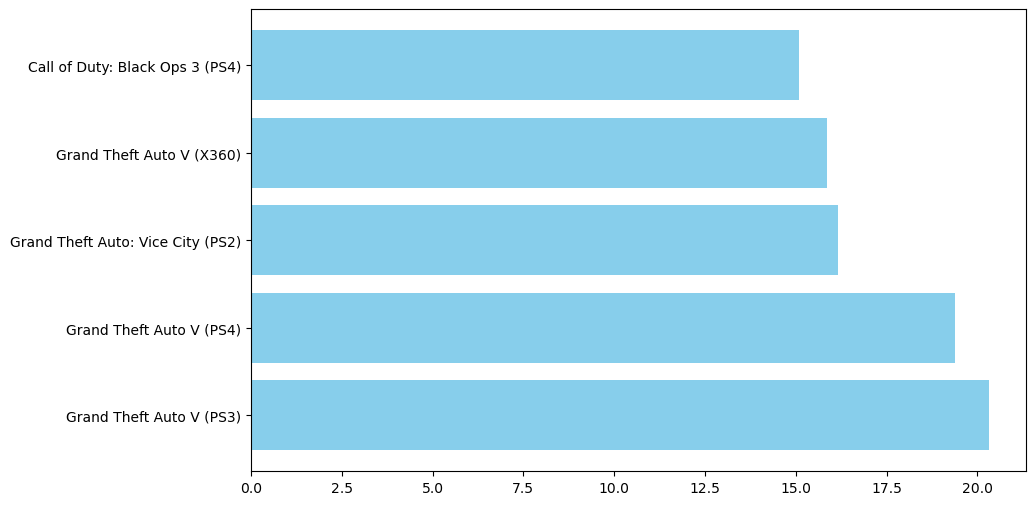

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(x, y, color='skyblue')


In [25]:
#Identifying Top Publishers based on Global Sales
df2 = df[['Publisher', 'Global_Sales']]

In [26]:
df2

,Publisher,Global_Sales
0,Rockstar Games,20.32
1,Rockstar Games,19.39
2,Rockstar Games,16.15
3,Rockstar Games,15.86
4,Activision,15.09
...,...,...
64010,Arc System Works,0.00
64011,Aksys Games,0.00
64012,Nippon Ichi Software,0.00
64013,Nippon Ichi Software,0.00


<BarContainer object of 30 artists>

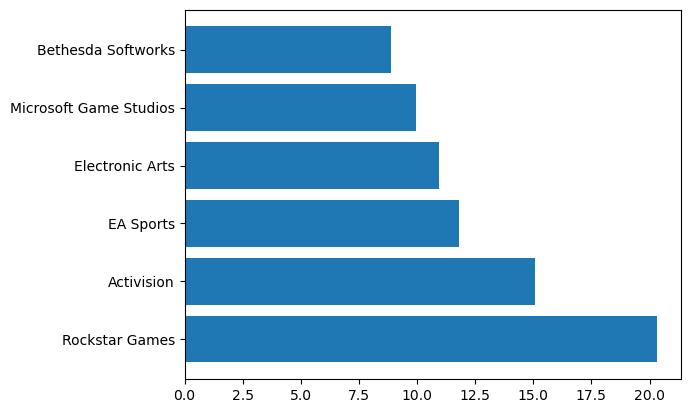

In [27]:
x = df2['Publisher'].head(30)
y = df2['Global_Sales'].head(30)
plt.barh(x,y)

In [38]:
#using a Pie Chart to display how each region make up of Global Sales in Percentage
region_totals = {
    "NA": df["NA_Sales"].sum(),
    "JP": df["JP_Sales"].sum(),
    "PAL": df["PAL_Sales"].sum(),
    "Foreign": df["Foreign_Sales"].sum(),
}

In [39]:
regions = list(region_totals.keys())
sales = list(region_totals.values())

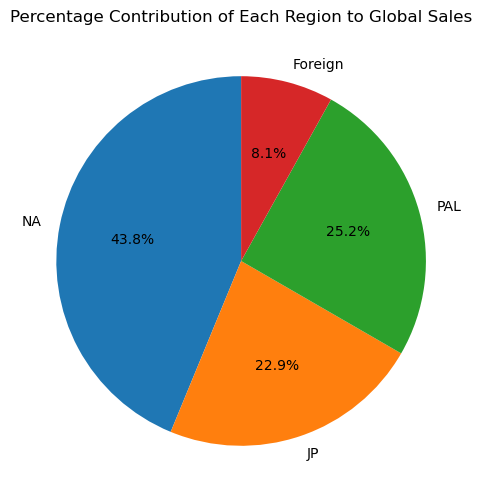

In [40]:
plt.figure(figsize=(6, 6))
plt.pie(sales, labels=regions, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Contribution of Each Region to Global Sales")
plt.show()

In [41]:
#Saving Updated Dataset for Later Examinations
df.to_csv("updated_dataset.csv", index=False)